In [1]:
import sys
import os
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from IPython.display import clear_output
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:

consumer_key='zudclAoWU82m06neTs3KjwJhs'
consumer_secret='3wjFJgDjG8Qjj612PWrJqDPawNtgGPjEEsuek2EJGsWRrPrEm9'

In [15]:

#auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
ACCESS_TOKEN = '800229120214847488-crwcTlQG9zNJT1q2kPx3jQWueIx3Cax'
ACCESS_SECRET = 'MDkZj17BZvc5TnYHQK9dahbXLxl9nRCkk1uVQql9KbG1j'
CONSUMER_KEY = 'zudclAoWU82m06neTs3KjwJhs'
CONSUMER_SECRET = '3wjFJgDjG8Qjj612PWrJqDPawNtgGPjEEsuek2EJGsWRrPrEm9'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth)
api.wait_on_rate_limit = True
api.wait_on_rate_limit_notify = True
api = tweepy.API(auth, wait_on_rate_limit=True)
if (not api):
    print ("Can't Authenticate")
    sys.exit(-1)



In [24]:
geoc="38.9072,-77.0369,1mi"
new_tweets=api.search_tweets(q='amazon',geocode=geoc,lang='en',count=100)

In [13]:

tweet_lst=[]
geoc="38.9072,-77.0369,1mi"
for tweet in tweepy.Cursor(api.search_tweets(q='tesla',lang='en'),geocode=geoc).items(1000):
    tweetDate = tweet.created_at.date()
    if(tweet.coordinates !=None):
        tweet_lst.append([tweetDate,tweet.id,tweet.
        coordinates['coordinates'][0],
        tweet.coordinates['coordinates'][1],
        tweet.user.screen_name,
        tweet.user.name, tweet.text,
        tweet.user._json['geo_enabled']])
tweet_df = pd.DataFrame(tweet_lst, columns=['tweet_dt', 'id', 'lat','long','username', 'name', 'tweet','geo'])

AttributeError: 'API' object has no attribute 'search'

In [ ]:
len(tweet_df)

714

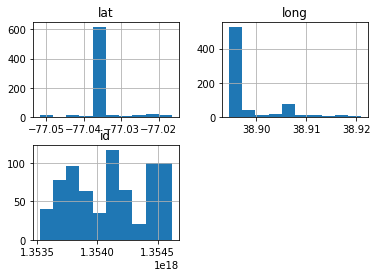

In [ ]:
tweet_df[['lat','long','id']].hist();

In [ ]:
#number of unique latitudes in the data
len(tweet_df['lat'].unique())

80

In [ ]:

len(tweet_df['id'].unique())

714

In [ ]:
#looking at the subset of tweets at the most popular location within the dataset
tweet_df.loc[tweet_df['long']==tweet_df['long'].value_counts().index[0]]

In [ ]:
#looking at the subset of tweets at the 2nd most popular location within the dataset
tweet_df.loc[tweet_df['long']==tweet_df['long'].value_counts().index[1]]

In [25]:
#pulling tweets from a larger location radius (max of 25 miles)
tweet_lst=[]
tweet_lst2=[]
geoc="38.9072,-77.0369,25mi"
for tweet in tweepy.Cursor(api.search_tweets(q='TESLA',lang='en'),geocode=geoc).items(1000):
    tweetDate = tweet.created_at.date()
    tweet_lst2.append([tweetDate,tweet.id,
    tweet.user.screen_name,
    tweet.user.name, tweet.text,
    tweet.user._json['geo_enabled']])
    if(tweet.coordinates !=None):
        tweet_lst.append([tweetDate,tweet.id,tweet.
        coordinates['coordinates'][0],
        tweet.coordinates['coordinates'][1],
        tweet.user.screen_name,
        tweet.user.name, tweet.text,
        tweet.user._json['geo_enabled']])
tweet_df_25 = pd.DataFrame(tweet_lst, columns=['tweet_dt', 'id', 'lat','long','username', 'name', 'tweet','geo'])
tweet_df_25_2 = pd.DataFrame(tweet_lst2, columns=['tweet_dt', 'id','username', 'name', 'tweet','geo'])

TweepyException: This method does not perform pagination

In [ ]:
twitter geospacial data bro fucking twitter is so stupid . i hst